<a href="https://colab.research.google.com/github/katrinag2004/ds3001assignments/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! git clone https://www.github.com/ds4e/clustering

fatal: destination path 'clustering' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

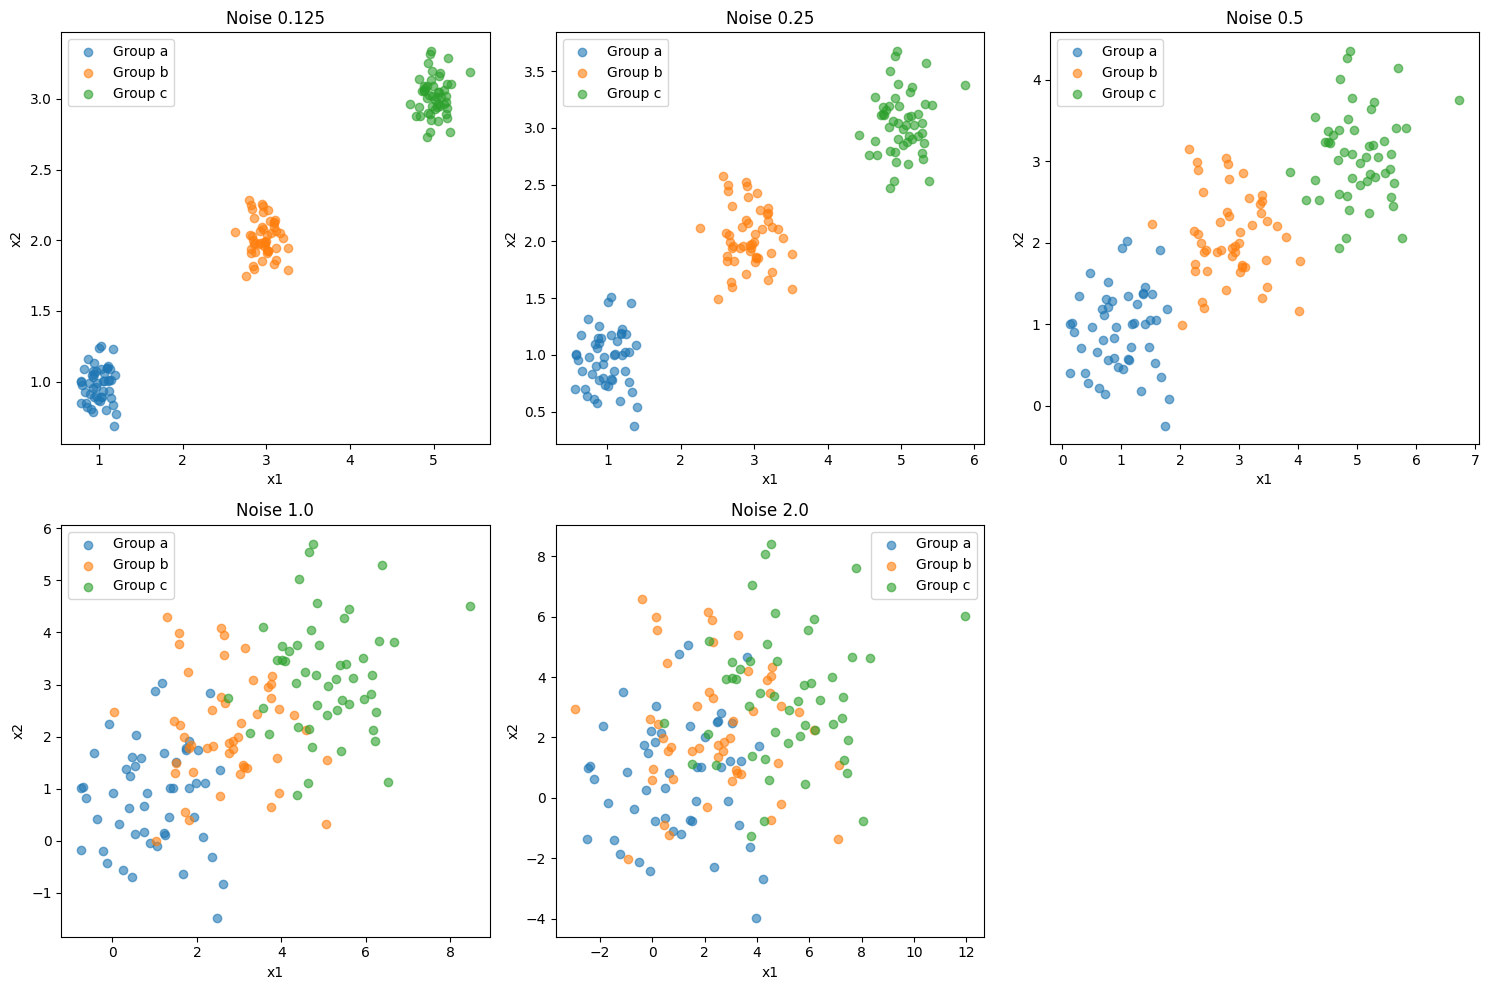

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def createData(noise, N=50):
    np.random.seed(100)  # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

# Create datasets with increasing noise levels
datasets = {
    "Noise 0.125": createData(0.125),
    "Noise 0.25": createData(0.25),
    "Noise 0.5": createData(0.5),
    "Noise 1.0": createData(1.0),
    "Noise 2.0": createData(2.0)
}

# Plot each dataset
plt.figure(figsize=(15, 10))
for i, (title, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)
    for group in df['group'].unique():
        subset = df[df['group'] == group]
        plt.scatter(subset['x1'], subset['x2'], label=f'Group {group}', alpha=0.6)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

plt.tight_layout()
plt.show()



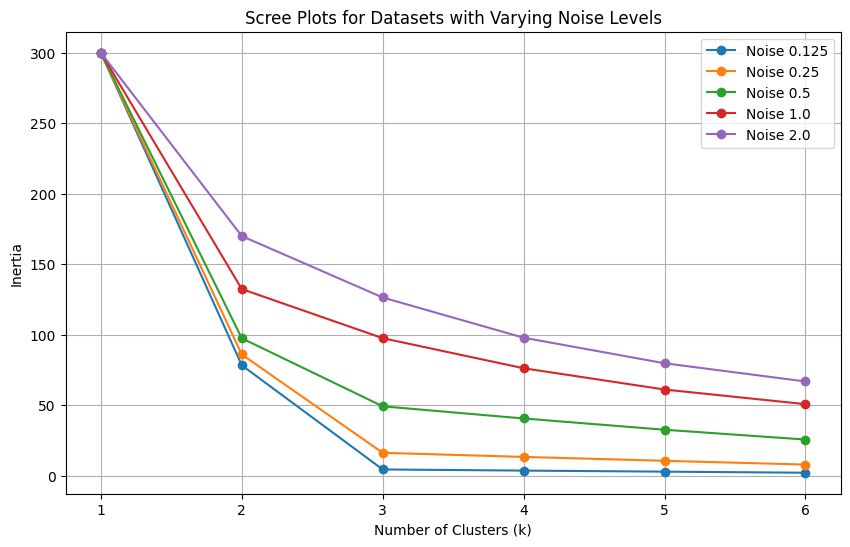

In [4]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def compute_inertia(df, max_k=6):
    X = df[['x1', 'x2']].values
    X = StandardScaler().fit_transform(X)
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia


inertia_values = {key: compute_inertia(df) for key, df in datasets.items()}


plt.figure(figsize=(10, 6))
for label, inertia in inertia_values.items():
    plt.plot(range(1, 7), inertia, marker='o', label=label)

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plots for Datasets with Varying Noise Levels')
plt.legend()
plt.grid()
plt.show()



 **As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?**
They become less clustered and more meshed together, all into one blob in the last graph.

**Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)**

As noise increases, the elbow goes away, showing the meshing of all of the groups in the other graph. This makes it more difficult to determine the true number of clusters.

**Explain the intuition of the elbow, using this numerical simulation as an example.**

It marks the point where dividing the data into more clusters produces limited additional insight or reduction in variance.



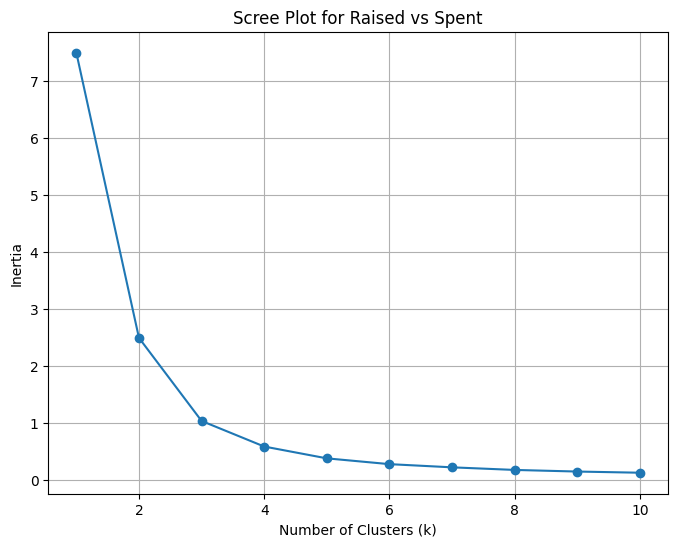

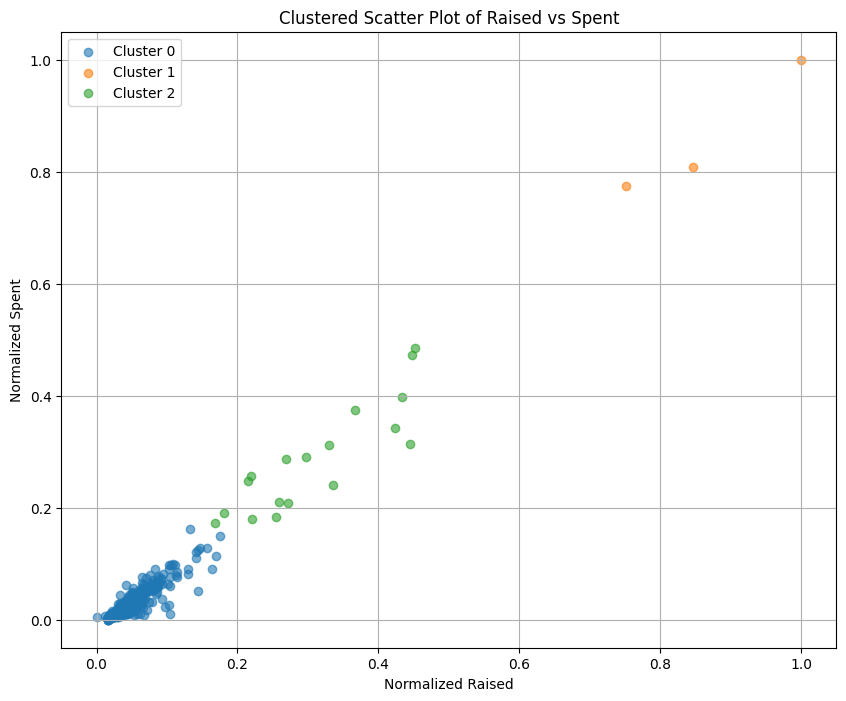

Politicians in the smallest clusters:
                     Member  Cluster
2               Adam Schiff        2
87   Catherine Cortez Masto        2
89            Chuck Schumer        2
115            Dan Crenshaw        2
261            John Kennedy        2
290            Katie Porter        2
298          Kevin McCarthy        2
326           Maggie Hassan        2
328             Marco Rubio        2
340              Mark Kelly        1
357          Michael Bennet        2
390            Nancy Pelosi        2
402            Patty Murray        2
414               Rand Paul        2
417         Raphael Warnock        1
442             Ron Johnson        2
476           Steve Scalise        2
490                Ted Cruz        2
499                Tim Ryan        2
500               Tim Scott        2
523             Val Demings        1


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


file_path = '/content/clustering/assignment/data/2022 election cycle fundraising.csv'
df = pd.read_csv(file_path)


def clean_currency(value):
    return pd.to_numeric(value.replace('$', '').replace(',', ''), errors='coerce')

df['Raised'] = df['Raised'].apply(clean_currency)
df['Spent'] = df['Spent'].apply(clean_currency)
df['Cash on Hand'] = df['Cash on Hand'].apply(clean_currency)
df['Debts'] = df['Debts'].apply(clean_currency)


df.dropna(subset=['Raised', 'Spent', 'Cash on Hand', 'Debts'], inplace=True)


scaler = MinMaxScaler()
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']])


def plot_scree(data, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Scree Plot for Raised vs Spent')
    plt.grid()
    plt.show()

plot_scree(df[['Raised', 'Spent']])


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent']])


plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Raised'], cluster_data['Spent'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Normalized Raised')
plt.ylabel('Normalized Spent')
plt.legend()
plt.title('Clustered Scatter Plot of Raised vs Spent')
plt.grid()
plt.show()


smallest_clusters = df['Cluster'].value_counts().tail(2).index
smallest_politicians = df[df['Cluster'].isin(smallest_clusters)][['Member', 'Cluster']]
print("Politicians in the smallest clusters:")
print(smallest_politicians)



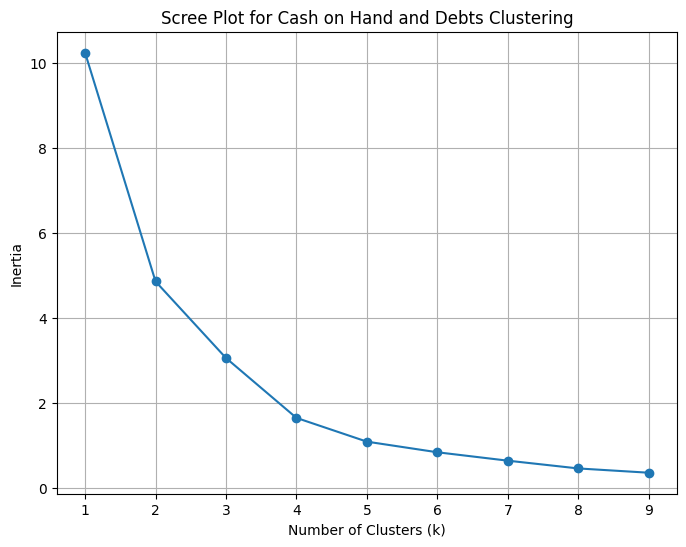

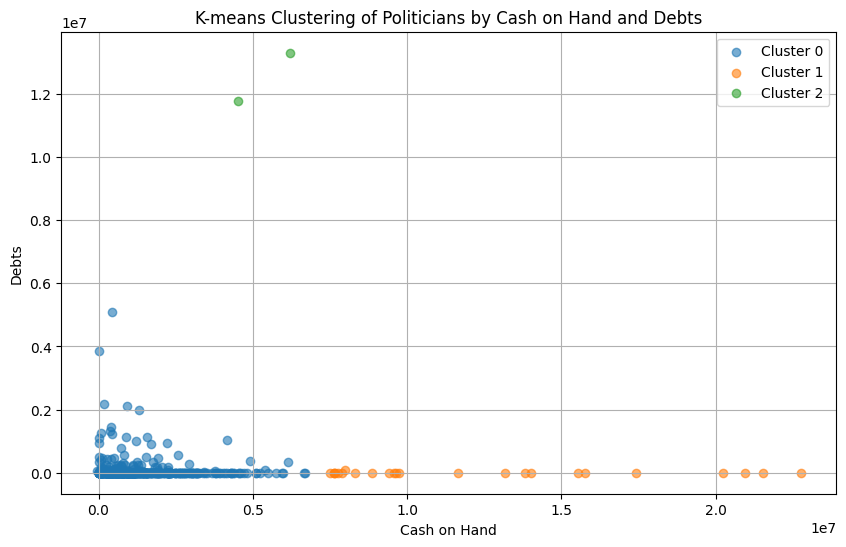

Politicians in the smallest cluster(s):
          Member  Cluster
133  David Trone        2
442  Ron Johnson        2


In [10]:


def clean_currency(col):
    return pd.to_numeric(col.replace({'\$': '', ',': ''}, regex=True))

df['Cash on Hand'] = clean_currency(df['Cash on Hand'])
df['Debts'] = clean_currency(df['Debts'])


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Cash on Hand', 'Debts']])


inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for Cash on Hand and Debts Clustering')
plt.grid()
plt.show()

# Fit K-means with optimal k (choose based on elbow)
optimal_k = 3  # Adjust based on your scree plot
kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Cash on Hand'], subset['Debts'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.title('K-means Clustering of Politicians by Cash on Hand and Debts')
plt.legend()
plt.grid()
plt.show()

# Find politicians in the smallest clusters
small_clusters = df['Cluster'].value_counts().idxmin()
smallest_cluster_df = df[df['Cluster'] == small_clusters][['Member', 'Cluster']]

print("Politicians in the smallest cluster(s):")
print(smallest_cluster_df)



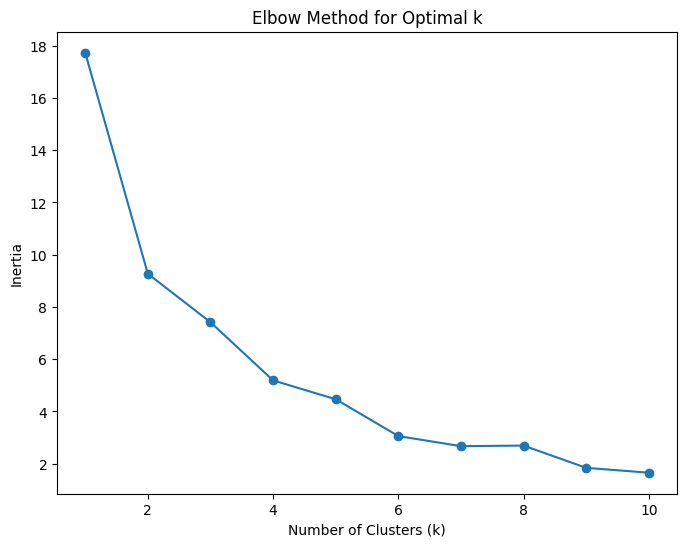

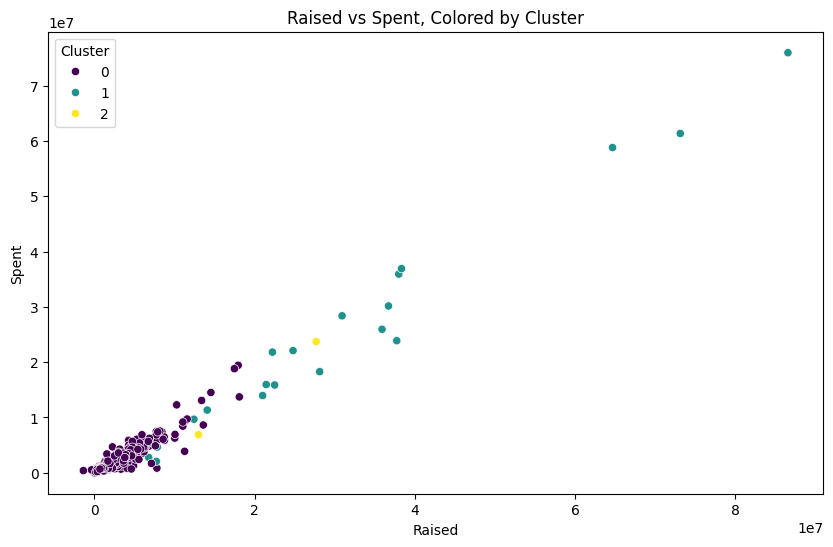

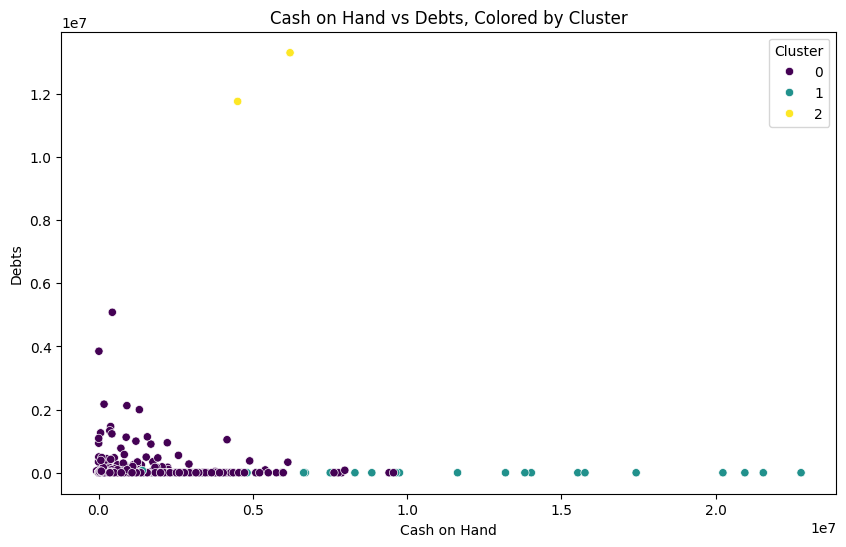

Politicians in the smallest clusters:
                     Member  Cluster
2               Adam Schiff        1
45           Bernie Sanders        1
87   Catherine Cortez Masto        1
89            Chuck Schumer        1
133             David Trone        2
239              Jim Jordan        1
261            John Kennedy        1
267              John Thune        1
274         Josh Gottheimer        1
290            Katie Porter        1
298          Kevin McCarthy        1
310          Lindsey Graham        1
326           Maggie Hassan        1
328             Marco Rubio        1
340              Mark Kelly        1
390            Nancy Pelosi        1
412     Raja Krishnamoorthi        1
414               Rand Paul        1
417         Raphael Warnock        1
442             Ron Johnson        2
499                Tim Ryan        1
500               Tim Scott        1
523             Val Demings        1


In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data: remove dollar signs and commas, then convert to float
columns_to_clean = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
for col in columns_to_clean:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Normalize the relevant columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# Use the Elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (based on the elbow plot)
optimal_k = 3  # Adjust if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Scatter plot of Raised vs Spent, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Raised', y='Spent', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.title('Raised vs Spent, Colored by Cluster')
plt.show()

# Scatter plot of Cash on Hand vs Debts, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cash on Hand', y='Debts', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.title('Cash on Hand vs Debts, Colored by Cluster')
plt.show()

# Check which politicians are in the smallest clusters
cluster_counts = df['Cluster'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index

small_clusters_df = df[df['Cluster'].isin(smallest_clusters)][['Member', 'Cluster']]
print("Politicians in the smallest clusters:")
print(small_clusters_df)


Q2.

**The variables denominated in dollars are messy and require cleaning. How do you handle it?**

Remove commas, convert to numeric format,.

**Max-min normalize Raised and Spent. Use a scree plot to determine the optimal number of clusters for the means clustering algorithm. Make a scatter plot of Raised against Spent and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters?**
Cluster 1 raises and spends the most. Smallest 2 clusters are cluster 1 and 2. Nancy Pelosi, John Kennedy and Marco Rubio comprise cluster 2. Val Demings, Raphael Warnock, and Mark Kelly are the only politicians in cluster 1.

**Repeat part 2, but for Cash on Hand and Debts. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.**
Cluster 2 has more debts than cash on hand than the other two. Cluster 1 has the most cash on hand while cluster 0 has the least cash on hand. Politicians with high debt and low cash like Cluster 2 probably fought harder battles, while those with lots of leftover cash like Cluster 1 might have been in safer seats.

**Use means clustering with all four numeric variables. How do your results compare to the previous two parts? Did the -MC algorithm find useful patterns for you in analyzing the election**
 When using K-means clustering with all four numeric variables (Raised, Spent, Cash on Hand, and Debts), the results can be compared to the previous analyses that used only two variables at a time.

